# Multi-label image classification on TraffyFondue dataset

เป็นแอปพลิเคชั่นสำหรับรับแจ้งปัญหา ข้อเสนอแนะจากผู้แจ้ง และ ระบบสนับสนุนการบริหารจัดการปัญหาให้มีประสิทธิภาพสูงขึ้น โดยผู้แจ้งไม่จำเป็นต้องรู้จักกับเจ้าหน้าที่ หรือทราบว่าใครเป็นผู้รับผิดชอบปัญหามาก่อน ก็สามารถแจ้งปัญหาได้ ระบบออกแบบมาให้ง่ายต่อการใช้งาน เพียงแค่ผู้แจ้งทำการถ่ายรูปและระบุประเภทของปัญหา ระบบจะทำการแจ้งปัญหาดังกล่าวไปยังเจ้าหน้าที่และทีมงานที่รับผิดชอบทันที ในด้านของเจ้าหน้าที่ ระบบจะช่วยคัดแยกประเภทของปัญหาและแจ้งปัญหาต่อเจ้าหน้าที่ผู้ที่มีหน้าที่ดูแลและรับผิดชอบโดยตรง ระบบสามารถให้ข้อมูลความก้าวหน้าในการดำเนินการและติดตามสถานะของปัญหาได้ผ่านโทรศัพท์มือถือ ระบบนี้ช่วยให้ผู้แจ้งมีส่วนร่วมในการดูแลสภาพแวดล้อมของชุมชน(คอนโดมิเนียม, นิคมอุตสาหกรรม, หมู่บ้าน) ของตนเอง และยังเปิดโอกาสให้ผู้แจ้งสามารถให้กำลังใจ ติชมการปฏิบัติงานของเจ้าหน้าที่ได้อีกด้วย ผู้แจ้งและเจ้าหน้าที่สามารถสื่อสารและช่วยกันแก้ไขปัญหาชุมชนร่วมกัน ซึ่งทำให้เกิดความหวงแหน ดูแล รักษา ให้ชุมชน(คอนโดมิเนียม, นิคมอุตสาหกรรม, หมู่บ้าน) มีความน่าอยู่ยิ่งขึ้น

Multi Label Image classification

10 classes of cases reported from Traffy Fondue
sanitary(ความสะอาด), sewer (ท่อระบายน้ำ), stray (สัตว์จรจัด), canal (คลอง), light (แสงสว่าง), flooding (น้ำท้วม), electric (สายไฟ), traffic (จราจร), road (ถนน), sidewalk (ทางเท้า)

Train 9376 images (images from kaggle that were cleaned and scraped images), Test 4,648 images

*Please note that I ran this notebook on Kaggle

# Install Library

In [1]:
!pip install wandb torchsummaryX


In [2]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 56.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 34.5 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143882 sha256=a0c640104d7da35363f292325d2d356311d69afffe3deb15d890858ab43e8a97
  Stored in directory: /root/.cache/pip/wheels/ad/af/3f/e02bab6c5c7e8177d1ed7b69065ca626fb8e711fcf2fe83500
Successfully built databricks-cli
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3
    Uninstalling pytz-2023.3:
      Successfully uninstalled pytz-2023.3
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Unins

In [3]:
pip install mlflow dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 6.6 MB/s eta 0:00:00
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10503 sha256=5bdd5681c63d87bc00258144d3a4155166a3dd6b230af900a00a165ebbe6f14b
  Stored in directory: /root/.cache/pip/wheels/6d/6a/b0/ed8466ddd6bffa8cf7fbc97231354027b0bea339be7cf50c49
Successfully built fusepy
  Attempting uninstall: rich
    Found existing installation: rich 13.2.0
    Uninstalling rich-13.2.0:
      Successfully uninstalled rich-13.2.0
  Attempting uninstall: h11
    Found existing i

# Import Libraries

In [4]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import re
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image
import os

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, SGD
from IPython.display import display
from torchsummaryX import summary
from torch.optim import lr_scheduler
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

from torch.nn import Embedding, Dropout, GRU, LSTM, Linear, CrossEntropyLoss 
import mlflow
import mlflow.pytorch

# Setup

### Daghub and MLflow

In [5]:
import dagshub
dagshub.init("DataSci_Project", "DataSci_Project", mlflow=True)
#https://dagshub.com/akkharawatbct/DataSci_Project.mlflow

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=6211330b-cf87-44cf-9330-46f4f74813c4&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=0632eaf94085c555c4ad2383096496a8eff7a4dbc5d558f757bbe948e180826c




Repository initialized!

In [6]:
mlflow.set_tracking_uri('https://dagshub.com/akkharawatbct/DataSci_Project.mlflow')
mlflow.set_experiment(experiment_name="multi_label_img_cls")

2023/05/18 06:06:34 INFO mlflow.tracking.fluent: Experiment with name 'multi_label_img_cls' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/23d52a19589c44f1b50853243884a461', creation_time=1684389994778, experiment_id='0', last_update_time=1684389994778, lifecycle_stage='active', name='multi_label_img_cls', tags={}>

## Using GPU P 100 in Kaggle

In [7]:
!nvidia-smi -L


GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-936b18e7-acdc-5ece-f30b-bf292d1b1aa4)


In [8]:
device = torch.device("cuda:0")
print(f"Using {device} device")

Using cuda:0 device


Assign index to labels

In [9]:
classes = ['canal', 'electric', 'flooding', 'light', 'road', 'sanitary', 'sewer', 'sidewalk', 'stray', 'traffic']
classes_idx = list(range(len(classes)))
classes_idx = dict(zip(classes, classes_idx))
classes_idx

{'canal': 0,
 'electric': 1,
 'flooding': 2,
 'light': 3,
 'road': 4,
 'sanitary': 5,
 'sewer': 6,
 'sidewalk': 7,
 'stray': 8,
 'traffic': 9}

## Prepare Image Augmentation

In [10]:
transform_train = transforms.Compose(
    [transforms.Resize((230,230)),
        transforms.RandomRotation(30,),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4303, 0.4301, 0.4139], std=[0.2186, 0.2140, 0.2205]) #nomalize imagenet pretrain
    ])

transform = transforms.Compose(
    [transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4303, 0.4301, 0.4139], std=[0.2186, 0.2140, 0.2205])
    ])


## Generate filename.csv

In [11]:
path = '/kaggle/input/traffyfonduedata/train_dataset'

In [12]:
def gen_filename():
    basePath = path
    counter = {}
    export = []

    folder = ['canal','electric','flooding','light','road','sanitary','sewer','sidewalk','stray','traffic']
    for l in folder:
        
        counter[l]=0

#         if not os.path.exists(os.path.join(basePath,l)):
#             os.makedirs(os.path.join(basePath,l))

        _, _, files = next(os.walk(os.path.join(basePath,l)))
        if '.DS_Store' in files: 
            files.remove('.DS_Store')

        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                export.append([f,l])
                counter[l]+=1

    df = pd.DataFrame(export,columns=['filename','class'])
    df.to_csv('filenames.csv',index=False)

    print('total files =',sum(counter.values()))
    print(counter)
    
gen_filename()

total files = 9376
{'canal': 663, 'electric': 1086, 'flooding': 1369, 'light': 1263, 'road': 1818, 'sanitary': 544, 'sewer': 797, 'sidewalk': 846, 'stray': 355, 'traffic': 635}


In [13]:
df = pd.read_csv('filenames.csv')
df

,filename,class
0,train_canal_img_367.jpg,canal
1,train_canal_img_1043.jpg,canal
2,train_canal_img_855.jpg,canal
3,train_canal_img_1049.jpg,canal
4,train_canal_img_1258.jpg,canal
...,...,...
9371,train_road_img_3173.jpg,traffic
9372,train_traffic_img_90.jpg,traffic
9373,train_traffic_img_79.jpg,traffic
9374,train_light_img_775.jpg,traffic


In [14]:
df['class'].value_counts()

road        1818
flooding    1369
light       1263
electric    1086
sidewalk     846
sewer        797
canal        663
traffic      635
sanitary     544
stray        355
Name: class, dtype: int64

In [15]:
df['filename'].iloc[0]

'train_canal_img_367.jpg'

In [16]:
from collections import defaultdict
dictemp = defaultdict(list)
for i in range(len(df)):
    img_dir = path
    dictemp[df['filename'].iloc[i].strip()].append(classes_idx[df['class'].iloc[i].strip()])

multilabel_list = []
for key,val in dictemp.items():
    input = [key, [1 if i in dictemp[key] else 0 for i in range(10)]]
    multilabel_list.append(input)
multilabel_list[8000:8005]

[['train_stray_img_18.jpg', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 ['train_stray_img_102.jpg', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 ['train_stray_img_31.jpg', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 ['train_stray_img_326.jpg', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 ['train_stray_img_242.jpg', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]]

In [17]:
multilabel_df = pd.DataFrame(multilabel_list, columns=['filename', 'class'])

In [18]:
multilabel_df['class_name'] = multilabel_df['class']
for index, row in multilabel_df.iterrows():
    for i in range(len(multilabel_df.loc[index,'class'])): 
        if multilabel_df.loc[index,'class'][i]==1: 
            multilabel_df.loc[index,'class_name'] = classes[i]
            break

In [19]:
multilabel_df.head(3)

,filename,class,class_name
0,train_canal_img_367.jpg,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",canal
1,train_canal_img_1043.jpg,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",canal
2,train_canal_img_855.jpg,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",canal


In [20]:
# just to recheck
tmp = multilabel_df.copy()
tmp['n'] = tmp['class'].apply(lambda x: sum(x))
(tmp['n']>1).sum()

535

## Find the mean and standard deviation to Normalize a tensor image which is used in image augmentation part above

In [ ]:
# img_dir = './Data/train'
# means = []
# stds = []
# to_tensor = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
# for i in range(len(df)):
#     os.path.join(img_dir, df.iloc[i,1].strip(), df.iloc[i,0].strip())
#     img = Image.open(os.path.join(img_dir, df.iloc[i,1].strip(), df.iloc[i,0].strip())).convert('RGB')
#     tensor = to_tensor(img)
#     means.append(tensor.mean(dim=(1,2)))
#     stds.append(tensor.std(dim=(1,2)))
    
# mean = torch.stack(means, dim=0).mean(dim=0)
# std = torch.stack(stds, dim=0).mean(dim=0)
# print(mean, std)

# Split the dataset into train set, validation set, and test set with ratio 80:10:10 respectively

Applied stratification and random state = 2022

In [21]:
from sklearn.model_selection import train_test_split

def train_test_split_unique(df: pd.DataFrame, test_size: float, random_state: int = None):
    # counts label occurance
    df['class_str'] = df['class'].apply(lambda x: str(x))
    label_counts = df['class_str'].value_counts().to_dict()
    df['occur'] = df['class_str'].map(label_counts)
    
    # reassign row with only 1 label occurance
    for index, row in df[df['occur']==1].iterrows():
        i = np.random.choice(10,size=1,p=[x/sum(df.loc[index,'class']) for x in df.loc[index,'class']])
        df.loc[index,'class_str'] = str([1 if i[0]==k else 0 for k in range(10)])
    
    # perform train_test_split with stratify on column 'class_str'
    train_data, test_data = train_test_split(df, test_size=test_size, stratify=df['class_str'], random_state=random_state)
    
    # drop all temporary columns before return the outputs
    df.drop(['occur', 'class_str'], axis=1, inplace=True)
    train_data.drop(['occur', 'class_str'], axis=1, inplace=True)
    test_data.drop(['occur', 'class_str'], axis=1, inplace=True)
    
    return train_data, test_data

In [22]:
train_data, test_data = train_test_split_unique(multilabel_df,test_size=0.2,random_state=2022)
test_data, val_data = train_test_split_unique(test_data,test_size=0.5,random_state=2022)

# Preprocessing data for pytorch

In [23]:
class TraffyFondueDataset(Dataset):
    
    def __init__(self, 
                 data, 
                 transforms=None):
        
        super().__init__()
        label_image = classes
        self.input_dataset = list()
        for i in range(len(data)):
            img_dir = path
            
            input = [os.path.join(img_dir, data.iloc[i,2].strip(), data.iloc[i,0].strip()), data.iloc[i,1]] # [image_path, label_list]
            if input not in self.input_dataset:
                self.input_dataset.append(input)
        
        self.transforms = transforms

    def __len__(self):
        return len(self.input_dataset)

    def __getitem__(self, idx): 
        img = Image.open(self.input_dataset[idx][0]).convert('RGB')
        x = self.transforms(img)
        y = self.input_dataset[idx][1]
        return x,y

trainset = TraffyFondueDataset(train_data, transform_train)
valset = TraffyFondueDataset(val_data,transform)
testset = TraffyFondueDataset(test_data,transform)
allset = TraffyFondueDataset(multilabel_df, transform_train)


# Prepare class weights to be applied while training the model

In [24]:
unique_values, counts = np.unique(df['class'], return_counts=True)
counts_lis = []
label_lis = []
for val, count in zip(unique_values, counts):
    counts_lis.append(count)
    label_lis.append(val)
counts_lis = np.array(counts_lis)

In [25]:
counts_lis

array([ 663, 1086, 1369, 1263, 1818,  544,  797,  846,  355,  635])

In [26]:
def get_weights_inverse_num_of_samples (no_of_classes, samples_per_cls, power = 1) :
    weights_for_samples = 1.0 / np.array (np.power (samples_per_cls, power))
    weights_for_samples = weights_for_samples / np.sum(weights_for_samples) * no_of_classes
    return weights_for_samples

In [27]:
num_classes=10
class_weights = get_weights_inverse_num_of_samples(10,  counts_lis)
class_weights.shape

(10,)

In [28]:
summary_stats = {
    'mean': np.mean(class_weights, axis=0),
    'std': np.std(class_weights, axis=0),
    'min': np.min(class_weights, axis=0),
    'max': np.max(class_weights, axis=0),
}
summary_stats

{'mean': 1.0,
 'std': 0.4809917487231909,
 'min': 0.4177189367847972,
 'max': 2.139191625562708}

In [29]:
class_weights = torch.Tensor(class_weights).to(device)

# Prepare Dataloader for pytorch

In [30]:
BATCH_SIZE = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)
allloader = torch.utils.data.DataLoader(allset, batch_size=BATCH_SIZE, shuffle=True)

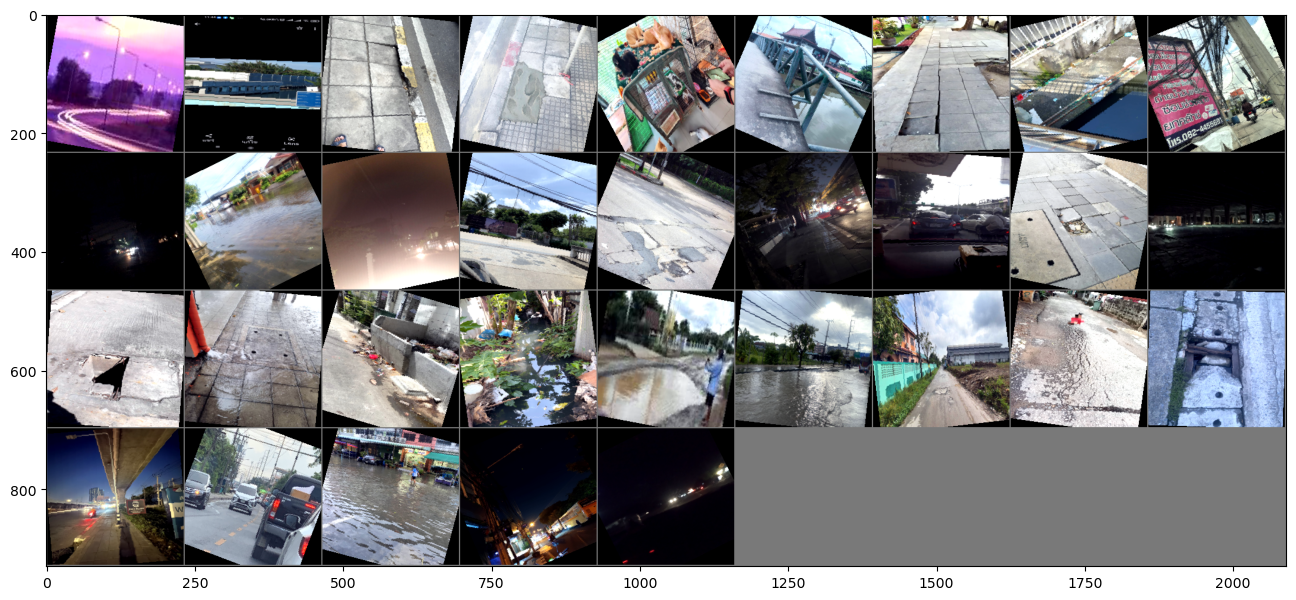

In [31]:
def imshow(img):
    img = img*torch.tensor([0.267, 0.256, 0.276]).mean() + torch.tensor([0.507, 0.487, 0.441]).mean()
    npimg = img.numpy()
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

nrow = 9
imshow(torchvision.utils.make_grid(images, nrow = nrow))

# Initialized the model and hyperparameters used for the training process.

In [32]:
num_classes = 10

efficientnet_version = 'b3'
model_ft = torchvision.models.efficientnet_b3(weights=True)
    
model_ft.classifier[-1] = nn.Sequential(
    nn.Linear(in_features=model_ft.classifier[-1].in_features, out_features=num_classes),
    nn.Sigmoid()
        )

model = model_ft.to(device)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-cf984f9c.pth


  0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [33]:
summary(model, torch.zeros((128, 3, 224, 224), dtype = torch.float).to(device))


/opt/conda/lib/python3.7/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


                                                         Kernel Shape  \
Layer                                                                   
0_features.0.Conv2d_0                                   [3, 40, 3, 3]   
1_features.0.BatchNorm2d_1                                       [40]   
2_features.0.SiLU_2                                                 -   
3_features.1.0.block.0.Conv2d_0                         [1, 40, 3, 3]   
4_features.1.0.block.0.BatchNorm2d_1                             [40]   
5_features.1.0.block.0.SiLU_2                                       -   
6_features.1.0.block.1.AdaptiveAvgPool2d_avgpool                    -   
7_features.1.0.block.1.Conv2d_fc1                      [40, 10, 1, 1]   
8_features.1.0.block.1.SiLU_activation                              -   
9_features.1.0.block.1.Conv2d_fc2                      [10, 40, 1, 1]   
10_features.1.0.block.1.Sigmoid_scale_activation                    -   
11_features.1.0.block.2.Conv2d_0                   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.0.Conv2d_0,"[3, 40, 3, 3]","[128, 40, 112, 112]",1080.0,13547520.0
1_features.0.BatchNorm2d_1,[40],"[128, 40, 112, 112]",80.0,40.0
2_features.0.SiLU_2,-,"[128, 40, 112, 112]",NaN,NaN
3_features.1.0.block.0.Conv2d_0,"[1, 40, 3, 3]","[128, 40, 112, 112]",360.0,4515840.0
4_features.1.0.block.0.BatchNorm2d_1,[40],"[128, 40, 112, 112]",80.0,40.0
...,...,...,...,...
356_features.8.SiLU_2,-,"[128, 1536, 7, 7]",NaN,NaN
357_avgpool,-,"[128, 1536, 1, 1]",NaN,NaN
358_classifier.Dropout_0,-,"[128, 1536]",NaN,NaN


In [34]:
# all augmented dataV2 except vertical flip, random crop, and colorjitter, seed = 2022
# BATCH_SIZE = 32
NUM_EPOCHS = 20
learning_rate = 0.02
criterion = nn.BCELoss(weight=class_weights)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)



# Training loop

In [35]:
target_names = ['canal','electric','flooding','light','road','sanitary','sewer','sidewalk','stray','traffic']

In [ ]:
history_train = {'loss':np.zeros(NUM_EPOCHS), 'micro_avg':np.zeros(NUM_EPOCHS), 'macro_f1-score':np.zeros(NUM_EPOCHS)}
history_val = {'loss':np.zeros(NUM_EPOCHS), 'micro_avg':np.zeros(NUM_EPOCHS), 'macro_f1-score':np.zeros(NUM_EPOCHS)}
min_val_loss = 1e10
best_f1 = -1
PATH = './best_model.pth'
idx = 0

thresholding_lambda = lambda x: 1 if x > 0.5 else 0

with mlflow.start_run(run_name='tracking'):

    # Log the PyTorch model
    mlflow.pytorch.log_model(model_ft, "models")
    
    # Log parameters
    mlflow.log_param("effieicntnet_version", efficientnet_version)
    mlflow.log_param("batch size", BATCH_SIZE)
    mlflow.log_param("lr", learning_rate)
    mlflow.log_param("num_epochs", NUM_EPOCHS)
    
    for epoch in range(NUM_EPOCHS):  

        print(f'epoch {epoch + 1} \nTraining ...')
        model.train()
        y_predict = list()
        y_labels = list()
        predlist=[]
        truelist=[]

        training_loss = 0.0
        n = 0
        with torch.set_grad_enabled(True):
            for inputs, labels in tqdm(trainloader):
                labels = [torch.LongTensor(label) for label in labels]
                labels = torch.stack(labels)
                labels = labels.transpose(0, 1)

                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)

                loss = criterion(outputs, labels.float())
                loss.backward()
                optimizer.step()

                y_predict += list(np.vectorize(thresholding_lambda)(outputs.detach().cpu().numpy())) # threshold 0.5            
                y_labels += list(labels.cpu().numpy())

                mlflow.log_metric("train_loss", loss.item())

                training_loss += loss.item()
                n+=1

        scheduler.step()
        report = classification_report(y_labels, y_predict, digits = 4, output_dict = True, target_names=target_names)
        micro_avg = report["micro avg"]["f1-score"]
        f1 = report["macro avg"]["f1-score"]
        support = report["macro avg"]["support"]
        training_loss /= n
        print(f"training loss: {training_loss:.4}, micro_avg: {micro_avg:.4}, Macro f1-score: {f1:.4}, support: {support}" )
        history_train['loss'][epoch] = training_loss
        history_train['micro_avg'][epoch] = micro_avg
        history_train['macro_f1-score'][epoch] = f1

        mlflow.log_metric("train_f1", f1)
        mlflow.log_metric("support", support)

        print('validating ...')
        model.eval()

        optimizer.zero_grad()

        y_predict = list()
        y_labels = list()
        validation_loss = 0.0
        n = 0
        with torch.no_grad():
            for inputs, labels in tqdm(valloader):
                inputs = inputs.to(device)

                labels = [torch.LongTensor(label) for label in labels]
                labels = torch.stack(labels)
                labels = labels.transpose(0, 1)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels.float())
                validation_loss += loss.item()

                y_predict += list(np.vectorize(thresholding_lambda)(outputs.detach().cpu().numpy())) # threshold 0.5            
                y_labels += list(labels.cpu().numpy())
                n+=1

        report = classification_report(y_labels, y_predict, digits = 4, output_dict = True, target_names=target_names)
        micro_avg = report["micro avg"]["f1-score"]
        f1 = report["macro avg"]["f1-score"]
        support = report["macro avg"]["support"]
        validation_loss /= n
        print(f"validation loss: {validation_loss:.4}, micro_avg: {micro_avg:.4}, Macro f1-score: {f1:.4}, support: {support}" )
        history_val['loss'][epoch] = validation_loss
        history_val['micro_avg'][epoch] = micro_avg
        history_val['macro_f1-score'][epoch] = f1

        mlflow.log_metric("val_loss", validation_loss)
        mlflow.log_metric("val_f1", f1)
        mlflow.log_metric("support", support)

        if validation_loss < min_val_loss:
            torch.save(model.state_dict(), PATH)
            min_val_loss = validation_loss 

    print('Finished Training')
    
     # Save the loss function state dict
    torch.save(criterion.state_dict(), "loss_function.pth")
    mlflow.log_artifact("loss_function.pth", artifact_path="artifacts")

    # Save the optimizer state dict
    torch.save(optimizer.state_dict(), "optimizer.pth")
    mlflow.log_artifact("optimizer.pth", artifact_path="artifacts")

    # Save the scheduler state dict
    torch.save(scheduler.state_dict(), "scheduler.pth")
    mlflow.log_artifact("scheduler.pth", artifact_path="artifacts")
    
    mlflow.end_run()

epoch 1 
Training ...


100%|██████████| 221/221 [08:07<00:00,  2.21s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.263, micro_avg: 0.09572, Macro f1-score: 0.07949, support: 7499
validating ...


100%|██████████| 28/28 [00:46<00:00,  1.68s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.2125, micro_avg: 0.5316, Macro f1-score: 0.4939, support: 937
epoch 2 
Training ...


100%|██████████| 221/221 [06:38<00:00,  1.80s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.1587, micro_avg: 0.5877, Macro f1-score: 0.5616, support: 7499
validating ...


100%|██████████| 28/28 [00:38<00:00,  1.37s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.1389, micro_avg: 0.7295, Macro f1-score: 0.7252, support: 937
epoch 3 
Training ...


100%|██████████| 221/221 [06:24<00:00,  1.74s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.1215, micro_avg: 0.7129, Macro f1-score: 0.7085, support: 7499
validating ...


100%|██████████| 28/28 [00:37<00:00,  1.34s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.108, micro_avg: 0.7843, Macro f1-score: 0.7812, support: 937
epoch 4 
Training ...


100%|██████████| 221/221 [06:17<00:00,  1.71s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.1022, micro_avg: 0.7662, Macro f1-score: 0.7635, support: 7499
validating ...


100%|██████████| 28/28 [00:37<00:00,  1.33s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.0968, micro_avg: 0.8143, Macro f1-score: 0.8078, support: 937
epoch 5 
Training ...


100%|██████████| 221/221 [06:18<00:00,  1.71s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.08904, micro_avg: 0.7981, Macro f1-score: 0.8015, support: 7499
validating ...


100%|██████████| 28/28 [00:36<00:00,  1.32s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.09192, micro_avg: 0.8259, Macro f1-score: 0.8207, support: 937
epoch 6 
Training ...


100%|██████████| 221/221 [06:19<00:00,  1.72s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.08075, micro_avg: 0.8163, Macro f1-score: 0.8191, support: 7499
validating ...


100%|██████████| 28/28 [00:37<00:00,  1.32s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.08679, micro_avg: 0.8335, Macro f1-score: 0.8302, support: 937
epoch 7 
Training ...


100%|██████████| 221/221 [06:14<00:00,  1.70s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.07402, micro_avg: 0.8298, Macro f1-score: 0.8339, support: 7499
validating ...


100%|██████████| 28/28 [00:36<00:00,  1.32s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.08312, micro_avg: 0.8431, Macro f1-score: 0.8423, support: 937
epoch 8 
Training ...


100%|██████████| 221/221 [06:14<00:00,  1.69s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.06668, micro_avg: 0.8449, Macro f1-score: 0.8503, support: 7499
validating ...


100%|██████████| 28/28 [00:36<00:00,  1.30s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.08171, micro_avg: 0.8481, Macro f1-score: 0.8459, support: 937
epoch 9 
Training ...


100%|██████████| 221/221 [06:14<00:00,  1.69s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.06382, micro_avg: 0.852, Macro f1-score: 0.8594, support: 7499
validating ...


100%|██████████| 28/28 [00:36<00:00,  1.31s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.0831, micro_avg: 0.8389, Macro f1-score: 0.8376, support: 937
epoch 10 
Training ...


100%|██████████| 221/221 [06:16<00:00,  1.70s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training loss: 0.0603, micro_avg: 0.855, Macro f1-score: 0.8627, support: 7499
validating ...


100%|██████████| 28/28 [00:35<00:00,  1.29s/it]
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation loss: 0.07738, micro_avg: 0.8504, Macro f1-score: 0.8498, support: 937
epoch 11 
Training ...


 68%|██████▊   | 150/221 [04:13<01:55,  1.62s/it]

#### Access mlflow ui via this link: https://dagshub.com/akkharawatbct/DataSci_Project.mlflow

In [ ]:
fig, axs = plt.subplots(2, figsize= (6,10))
# loss
axs[0].plot(history_train['loss'], label = 'training')
axs[0].plot(history_val['loss'], label = 'validation')
axs[0].set_title("loss")
axs[0].legend()

# f1-score
axs[1].plot(history_train['macro_f1-score'], label = 'training')
axs[1].plot(history_val['macro_f1-score'], label = 'validation')
axs[1].set_title("macro_f1-score")
axs[1].legend()
plt.show()

In [ ]:
%%time
model.load_state_dict(torch.load('./best_model.pth'))

# Testing on test set

In [ ]:
print('testing ...')
y_predict = list()
y_labels = list()
test_loss = 0.0
n = 0
with torch.no_grad():
    for data in tqdm(testloader):
        model.eval()
        inputs, labels = data
        inputs = inputs.to(device)
        labels = [torch.LongTensor(label) for label in labels]
        labels = torch.stack(labels)
        labels = labels.transpose(0, 1)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        test_loss += loss.item()

        y_predict += list(np.vectorize(thresholding_lambda)(outputs.detach().cpu().numpy())) # threshold 0.5            
        y_labels += list(labels.cpu().numpy())
        n+=1

    # print statistics
    test_loss /= n
    print(f"testing loss: {test_loss:.4}" )
    
    report = classification_report(y_labels, y_predict, digits = 4)
    M = confusion_matrix(y_labels, y_predict)
    print(report)
    disp = ConfusionMatrixDisplay(confusion_matrix=M)

In [ ]:
disp.plot()
plt.show()

In [ ]:
correct = 0
wrong = 0
checker = dict()
for i in range(len(y_predict)):
    if str(y_predict[i])==str(y_labels[i]): correct+=1
    else: wrong+=1; checker[i]=[y_predict[i],y_labels[i]]
print(f'correct:{correct} wrong:{wrong} acc:{correct/(correct+wrong)}')

In [ ]:
checker

# Train model with all data in train folder

I submitted result of this part to Kaggle

In [ ]:
num_classes = 10
model_ft = torchvision.models.efficientnet_b3(weights=True)

model_ft.classifier[-1] = nn.Sequential(
    nn.Linear(in_features=model_ft.classifier[-1].in_features, out_features=num_classes),
    nn.Softmax(dim=1)
        )

model = model_ft.to(device)

In [ ]:
NUM_EPOCHS = 23
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [ ]:
from sklearn.metrics import classification_report
from tqdm import tqdm


all_history_train = {'loss':np.zeros(NUM_EPOCHS), 'acc':np.zeros(NUM_EPOCHS), 'macro_f1-score':np.zeros(NUM_EPOCHS)}
min_val_loss = 1e10
best_f1 = -1
PATH = './best_model.pth'
PATH_F1 = './best_model_f1.pth'

for epoch in range(NUM_EPOCHS):  
    
    print(f'epoch {epoch + 1} \nTraining ...')
    model.train()
    y_predict = list()
    y_labels = list()
    training_loss = 0.0
    n = 0
    with torch.set_grad_enabled(True):
        for inputs, labels in tqdm(allloader):
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            training_loss += loss.item()
            n+=1

            y_labels += list(labels.cpu().numpy())
            y_predict += list(outputs.argmax(dim=1).cpu().numpy())
    scheduler.step()

    report = classification_report(y_labels, y_predict, digits = 4, output_dict = True)
    acc = report["accuracy"]
    f1 = report["macro avg"]["f1-score"]
    support = report["macro avg"]["support"]
    training_loss /= n
    print(f"training loss: {training_loss:.4}, acc: {acc*100:.4}%,  Macro f1-score: {f1*100:.4}%, support: {support}" )
    all_history_train['loss'][epoch] = training_loss
    all_history_train['acc'][epoch] = acc
    all_history_train['macro_f1-score'][epoch] = f1

    if training_loss < min_val_loss:
        torch.save(model.state_dict(), './best_model_train_all.pth')
        min_val_loss = training_loss
    
print('Finished Training')

In [ ]:
model.load_state_dict(torch.load('/kaggle/working/best_model_train_all.pth'))

# Submit to Kaggle

In [ ]:
import os
import pandas as pd
import argparse

path = '/kaggle/input/submittest/test'
def gen_filename():
    d={}
    images = os.listdir(path)
    sorted_filenames = sorted(images, key=lambda x: int(x.split("test")[1].split(".")[0]))
    for image in sorted_filenames:
        if image == '.DS_Store': continue
        d[image] = 0

    file = pd.DataFrame(d.keys(), columns=['ID'])
    file.to_csv('submission.csv', index=False)


gen_filename()


In [ ]:
submit = pd.read_csv('/kaggle/working/submission.csv')
submit


In [ ]:
test_path = '/kaggle/input/submittest/test'
class TestDataset(Dataset):
    
    def __init__(self, 
                 img_dir, 
                 transforms=None):
        
        super().__init__()
        self.input_dataset = list()

        _, _, files = next(os.walk(os.path.join(img_dir)))
        for image_name in submit['ID']:
            input = [os.path.join(img_dir,image_name), image_name] 
            self.input_dataset.append(input)
        
        self.transforms = transforms

    def __len__(self):
        return len(self.input_dataset)

    def __getitem__(self, idx): 
        img = Image.open(self.input_dataset[idx][0]).convert('RGB')
        x = self.transforms(img)
        return x, self.input_dataset[idx][1]

submitset = TestDataset(test_path,transform)
submitloader = torch.utils.data.DataLoader(submitset, batch_size=32, shuffle=False)

In [ ]:
print('running ...')
y_predict = list()
model.eval()
with torch.no_grad():
    for inputs, _ in tqdm(submitloader):

        inputs = inputs.to(device)
        outputs = model(inputs)
        y_predict += list(outputs.argmax(dim=1).cpu().numpy())
print('Finished')


In [ ]:
len(y_predict)

In [ ]:
submit_df = pd.DataFrame()
submit_df['ID'] = list(range(len(y_predict)))
submit_df['class'] = y_predict
submit_df

In [ ]:
submit_df.to_csv('submission86.csv', index=False)
